Breast Cancer Classification With Neural Networks

In [116]:
# Import Dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets 
from sklearn.model_selection import train_test_split

In [117]:
data = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(data.data , columns = data.feature_names)

In [118]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [119]:
df.shape

(569, 30)

In [120]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [121]:
df['label'] = data.target

In [122]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


1 ----> Bengin
0 ---> Malignant

In [123]:
if (df.isnull().sum().any() == True) : 
  print("Missing Data Found")
else : 
  print("No missing Data Found")

No missing Data Found


In [124]:
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [125]:
# Features and Target X Y
X  = df.drop('label',axis = 1)
Y = df['label']

In [126]:
#Splitting to train and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify = Y,random_state= 2)

In [127]:
# standardise the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


Building Neural Network

In [129]:
# Importing Tensorflow and Keras 
import tensorflow as tf
tf.random.set_seed(3) #To get the same parametere for weights , .... everytime we train the model 
from tensorflow import keras

In [130]:
# Setting up Layers 
model = keras.Sequential(
    [
    keras.layers.Flatten(input_shape= (30,)),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(2 , activation = 'sigmoid') 
    ])

In [131]:
#Compiling the model 
model.compile(loss ='sparse_categorical_crossentropy' , metrics = ['accuracy'] , optimizer = 'adam')

In [132]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

In [133]:
# Fitting the model 
hist = model.fit(X_train_scaled , Y_train , validation_split = 0.1 , epochs = 15 , callbacks = [early_stopping_monitor] )

Epoch 1/15
13/13 [==============================] - 1s 15ms/step - loss: 0.5714 - accuracy: 0.7017 - val_loss: 0.4989 - val_accuracy: 0.8261
Epoch 2/15
13/13 [==============================] - 0s 5ms/step - loss: 0.4051 - accuracy: 0.8729 - val_loss: 0.3503 - val_accuracy: 0.8478
Epoch 3/15
13/13 [==============================] - 0s 4ms/step - loss: 0.3117 - accuracy: 0.8998 - val_loss: 0.2641 - val_accuracy: 0.8913
Epoch 4/15
13/13 [==============================] - 0s 4ms/step - loss: 0.2560 - accuracy: 0.9095 - val_loss: 0.2136 - val_accuracy: 0.9348
Epoch 5/15
13/13 [==============================] - 0s 4ms/step - loss: 0.2198 - accuracy: 0.9193 - val_loss: 0.1824 - val_accuracy: 0.9565
Epoch 6/15
13/13 [==============================] - 0s 4ms/step - loss: 0.1955 - accuracy: 0.9364 - val_loss: 0.1604 - val_accuracy: 0.9565
Epoch 7/15
13/13 [==============================] - 0s 5ms/step - loss: 0.1763 - accuracy: 0.9413 - val_loss: 0.1444 - val_accuracy: 0.9565
Epoch 8/15
13/13 [=

Text(0, 0.5, 'Accuracy')

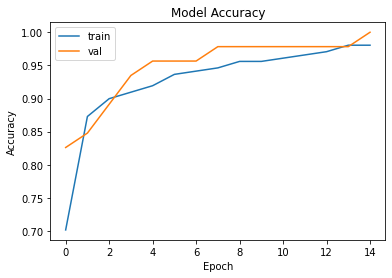

In [135]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','val'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

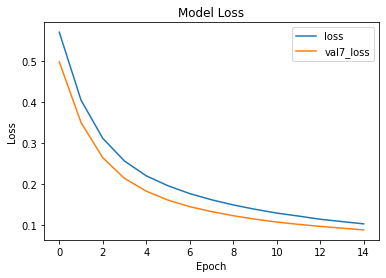

In [136]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val7_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [138]:
# Model Evaluation on test data
loss , accuracy = model.evaluate(X_test_scaled,Y_test)
print('Accuracy : ', accuracy) 
print('Loss : ', loss) 

4/4 [==============================] - 0s 5ms/step - loss: 0.0759 - accuracy: 0.9825
Accuracy :  0.9824561476707458
Loss :  0.07586944103240967


In [140]:
Y_pred = model.predict(X_test_scaled)
print(Y_pred.shape)
print(Y_pred[0])

4/4 [==============================] - 0s 5ms/step
(114, 2)
[0.7687036  0.07959338]


In [142]:
Y_pred_labels = [ np.argmax(pred) for pred in Y_pred]
print(Y_pred_labels)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]


In [147]:
# Building a predicitve system 
input_data = np.array([17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]).reshape(1,-1)

#Standardaize the input data 
input_data_std = scaler.transform(input_data)

#prediction 
prediction = model.predict(input_data_std)

pred_label = np.argmax(prediction)
if pred_label == 0 : 
  print('Tumor is cancerous')
else : 
  print('Tumor is noncancerous')

1/1 [==============================] - 0s 26ms/step
Tumor is cancerous


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
